In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import savemat
import scipy.io as sio
from scipy.ndimage import label

freq = 511
secs = 30

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 8: expected 2 fields, saw 3\n'


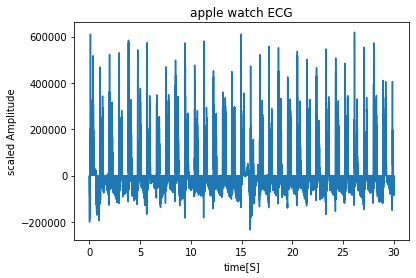

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ecg_2020-02-15.csv",error_bad_lines=False)
df = df.iloc[8:]
df = df.set_axis(["unit","amplitude"], axis=1)
df['unit'] = pd.to_numeric(df['unit'])
df['amplitude'] = pd.to_numeric(df['amplitude'])
df = df.dropna()
time = np.arange(df.size/2)/freq
plt.plot(time, df.unit * df.amplitude)
plt.xlabel("time[S]")
plt.ylabel("scaled Amplitude")
plt.title("apple watch ECG")
plt.show()

In [4]:
arr =(df.unit * df.amplitude).to_numpy()

mydic = {"val":arr}
savemat("ECG.mat", mydic)
